In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [3]:
sms_data = pd.read_csv("/content/drive/My Drive/NLP/sms.tsv",names = ['label','message'],sep = '\t')
sms_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# Quick way of converting string label to numeric targets
sms_data['target'] = sms_data.label.map({'ham':0, 'spam':1})

In [5]:
sms_data.head()

,label,message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X = sms_data.message
y = sms_data.target

print(X.shape, y.shape)

(5572,) (5572,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state =42)

In [0]:
kTokernizer = keras.preprocessing.text.Tokenizer()

In [0]:
kTokernizer.fit_on_texts(X_train)

In [0]:
#print(kTokernizer.word_counts)

In [12]:
# mode: one of "binary", "count", "tfidf", "freq"
vect_kTokenizer_train = kTokernizer.texts_to_matrix(X_train, mode='tfidf')
vect_kTokenizer_test = kTokernizer.texts_to_matrix(X_test,mode = 'tfidf')
# 0 is a reserved index that won't be assigned to any word.
print(vect_kTokenizer_train.shape)
print(vect_kTokenizer_test.shape)

(4457, 7934)
(1115, 7934)


# Convert tfidf to pandas DataFrame

In [0]:
pd_vect_kTokenizer = pd.DataFrame(data=vect_kTokenizer_train[:,1:], columns=[key for key in kTokernizer.word_index])

In [0]:
#pd_vect_kTokenizer

# Using WordEmbedding - a dense vector representation

In [15]:
sms_data['message'].shape

(5572,)

In [0]:
X_train_seq = kTokernizer.texts_to_sequences(X_train)
X_test_seq = kTokernizer.texts_to_sequences(X_test)

In [17]:
print(kTokernizer.word_index['he'])

71


In [18]:
print(X_train[:1])
print(X_train_seq[:1])

184    He will, you guys close?
Name: message, dtype: object
[[71, 32, 3, 338, 669]]


In [0]:
maxlen = 50
X_train_pad = keras.preprocessing.sequence.pad_sequences(sequences=X_train_seq, maxlen=maxlen)
X_test_pad = keras.preprocessing.sequence.pad_sequences(sequences=X_test_seq, maxlen=maxlen)

In [0]:
#print(X_train)
#print(X_train_seq)
#print(X_train_pad)

In [21]:
model_embed = keras.models.Sequential()
model_embed.add(keras.layers.Embedding(input_dim=9009, output_dim=10, input_length=50))
model_embed.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 10)            90090     
Total params: 90,090
Trainable params: 90,090
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_embed.compile('adam', 'mse')
#model_embed.fit(X_train_pad, epochs=2)

In [0]:
#pd_vect_kTokenizer

In [0]:
#print(X_test)
#print(X_test_seq)
#print(X_test_pad)

#model_embed.predict(X_test_pad)

# logistic regression 

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_reg = LogisticRegression()

In [27]:
log_reg.fit(X_train_pad,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_reg_score = log_reg.score(X_test_pad,y_test)

In [29]:
log_reg_score

0.8367713004484305

In [0]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [0]:
y_prd_log = log_reg.predict(X_test_pad)

In [32]:
confusion_matrix(y_true = y_test,y_pred=y_prd_log)

array([[916,  50],
       [132,  17]])

In [33]:
print("precision:", precision_score(y_true=y_test, y_pred=y_prd_log))
print("recall:", recall_score(y_true=y_test, y_pred=y_prd_log))
print("f1-score:", f1_score(y_true=y_test, y_pred=y_prd_log))

precision: 0.2537313432835821
recall: 0.11409395973154363
f1-score: 0.1574074074074074


 # random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rnd_clf = RandomForestClassifier()

In [36]:
rnd_clf.fit(X_train_pad,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rnd_clf_score = rnd_clf.score(X_test_pad,y_test)

In [38]:
rnd_clf_score

0.9219730941704036

In [0]:
y_rnd_pred = rnd_clf.predict(X_test_pad)

In [40]:
confusion_matrix(y_true=y_test,y_pred = y_rnd_pred)

array([[957,   9],
       [ 78,  71]])

In [41]:
print("precision:", precision_score(y_true=y_test, y_pred=y_rnd_pred))
print("recall:", recall_score(y_true=y_test, y_pred=y_rnd_pred))
print("f1-score:", f1_score(y_true=y_test, y_pred=y_rnd_pred))

precision: 0.8875
recall: 0.47651006711409394
f1-score: 0.6200873362445415


# deep learning

In [42]:
model_dnn = keras.models.Sequential()
model_dnn.add(keras.layers.Dense(units = 7934,input_shape =(7934,),activation = 'relu' ))
model_dnn.add(keras.layers.Dense(units = 2000,activation='relu'))
model_dnn.add(keras.layers.Dense(units = 1000,activation='relu'))
model_dnn.add(keras.layers.Dense(units = 500,activation='relu'))
model_dnn.add(keras.layers.Dense(units = 100,activation='relu'))
model_dnn.add(keras.layers.Dense(units = 2,activation='softmax'))
model_dnn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7934)              62956290  
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              15870000  
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 202       
To

In [0]:
model_dnn.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics =['accuracy'])

In [44]:
history_dnn = model_dnn.fit(vect_kTokenizer_train,y_train,epochs = 25,validation_split=0.1)

Train on 4011 samples, validate on 446 samples
Epoch 1/25
4011/4011 [==============================] - 4s 879us/sample - loss: 0.1553 - acc: 0.9619 - val_loss: 0.0847 - val_acc: 0.9865
Epoch 2/25
4011/4011 [==============================] - 3s 756us/sample - loss: 0.0064 - acc: 0.9983 - val_loss: 0.1552 - val_acc: 0.9933
Epoch 3/25
4011/4011 [==============================] - 3s 762us/sample - loss: 9.2235e-05 - acc: 1.0000 - val_loss: 0.1688 - val_acc: 0.9888
Epoch 4/25
4011/4011 [==============================] - 3s 763us/sample - loss: 3.4018e-04 - acc: 0.9998 - val_loss: 0.3034 - val_acc: 0.9798
Epoch 5/25
4011/4011 [==============================] - 3s 765us/sample - loss: 0.0092 - acc: 0.9990 - val_loss: 0.5110 - val_acc: 0.9798
Epoch 6/25
4011/4011 [==============================] - 3s 763us/sample - loss: 0.0011 - acc: 0.9998 - val_loss: 0.2691 - val_acc: 0.9843
Epoch 7/25
4011/4011 [==============================] - 3s 761us/sample - loss: 0.0123 - acc: 0.9995 - val_loss: 0.18

<function matplotlib.pyplot.show>

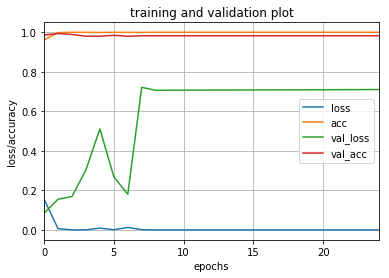

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_dnn.history).plot()
plt.grid(True)
plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.title('training and validation plot')
plt.show

In [46]:
test_loss,test_accuracy = model_dnn.evaluate(vect_kTokenizer_test,y_test)

1115/1115 [==============================] - 0s 149us/sample - loss: 0.5958 - acc: 0.9839


In [47]:
print("test_loss::::",test_loss)
print("test_accuracy::::",test_accuracy)

test_loss:::: 0.5958038940659109
test_accuracy:::: 0.9838565


# RNN

In [48]:
model_RNN = keras.models.Sequential()
model_RNN.add(keras.layers.Embedding(input_dim=9009, output_dim=10,input_length = 50))
model_RNN.add(keras.layers.LSTM(32))
model_RNN.add(keras.layers.Dense(1, activation="sigmoid"))
model_RNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 10)            90090     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                5504      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 95,627
Trainable params: 95,627
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_RNN.compile(loss="binary_crossentropy", optimizer="adam", metrics=["mae"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [50]:
history_RNN = model_RNN.fit(X_train_pad,y_train,epochs=20,validation_split =0.2)

Train on 3565 samples, validate on 892 samples
Epoch 1/20
3565/3565 [==============================] - 12s 3ms/sample - loss: 0.3369 - mean_absolute_error: 0.2292 - val_loss: 0.1716 - val_mean_absolute_error: 0.1245
Epoch 2/20
3565/3565 [==============================] - 12s 3ms/sample - loss: 0.1033 - mean_absolute_error: 0.0718 - val_loss: 0.0799 - val_mean_absolute_error: 0.0579
Epoch 3/20
3565/3565 [==============================] - 11s 3ms/sample - loss: 0.0424 - mean_absolute_error: 0.0288 - val_loss: 0.0780 - val_mean_absolute_error: 0.0334
Epoch 4/20
3565/3565 [==============================] - 12s 3ms/sample - loss: 0.0243 - mean_absolute_error: 0.0161 - val_loss: 0.0516 - val_mean_absolute_error: 0.0256
Epoch 5/20
3565/3565 [==============================] - 12s 3ms/sample - loss: 0.0136 - mean_absolute_error: 0.0094 - val_loss: 0.0547 - val_mean_absolute_error: 0.0273
Epoch 6/20
3565/3565 [==============================] - 12s 3ms/sample - loss: 0.0064 - mean_absolute_error:

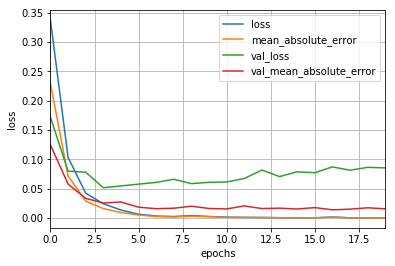

In [51]:
pd.DataFrame(history_RNN.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid(True)
plt.savefig("f5.png", format='png', dpi=300)
plt.show()

In [53]:
mae = model_RNN.evaluate(X_test_pad,y_test)

1115/1115 [==============================] - 1s 1ms/sample - loss: 0.0828 - mean_absolute_error: 0.0130
